In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [2]:
n_frames = 10
pixels = 32

P = torch.rand(pixels*n_frames,pixels*n_frames)
P.narrow(0,0,32).shape

D = torch.ones(pixels*n_frames,pixels)
for i in range(n_frames):
    D[(pixels*i):(pixels*(i+1)),:] = D[(pixels*i):(pixels*(i+1)),:]*i
B = torch.rand(pixels*(n_frames-1),pixels)*n_frames

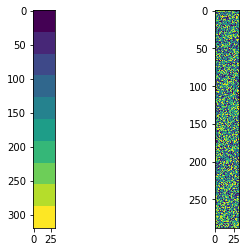

In [3]:
plt.subplot(1,2,1)
plt.imshow(D)
plt.subplot(1,2,2)
plt.imshow(B)

In [4]:
# Build block diagonal matrix in-place
def build_tridiag(D,B):
    # Initialize
    t, p = D.shape # number of frames (time bins), number of pixels
    t = int(t/p)
    tridiag = torch.zeros(pixels*t,p*t)
    
    # Go row-block by row-block
    for i in range(0,t):
        # Build block diagonal
        tridiag[(p*i):(p*(i+1)),(p*i):(p*(i+1))] = D[(p*i):(p*(i+1)),:]
        # Build off-diagonal blocks
        if i > 0:
            tridiag[(p*i):(p*(i+1)),(p*(i-1)):(p*i)] = B[(p*(i-1)):(p*i),:]
        if i < t-1:
            tridiag[(p*i):(p*(i+1)),(p*(i+1)):(p*(i+2))] = torch.t(B[(p*i):(p*(i+1)),:])
    
    return tridiag

P = build_tridiag(D,B)

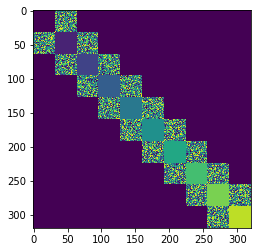

In [5]:
plt.imshow(P)

In [35]:
x = torch.randn(64,1,1)

In [36]:
x.shape

torch.Size([64, 1, 1])

In [28]:
torch.ger(x,x).shape

torch.Size([64, 64])

In [38]:
x.view(-1,64).repeat(1,n_frames-1).shape

torch.Size([1, 576])